# AIN422 Introduction to Deep Learning Lab
## Assignment 1 : Image Classification
#### Student Number: 21992919
##### Student Name/Surname : Melike Nur DULKADİR

**Aim of the Experiment**
- The aim of this assignment is to explore image classification, which entails the categorization and labeling of groups of pixels or vectors within an image based on specific rules. To accomplish this, three different classification algorithms will be implemented: k-Nearest Neighbor (KNN), Support Vector Machine (SVM), and Neural Network (NN).
- The CIFAR-10 dataset will be used for this assignment.

Before the assignment is started, the necessary libraries are imported.

In [49]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.utils import to_categorical
from sklearn.decomposition import PCA

%matplotlib inline

#### 1 - Loading the CIFAR-10 Dataset Using Keras

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [12]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


#### 2 - Analyzing the Dataset and Preprocessing


The labels of the dataset with their corresponding class names.

In [13]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels = np.unique(y_train, return_counts=True)[0]
data = {'Label': labels, 'Corresponding Class': cifar_classes}
headers = ['Label', 'Corresponding Class']
print(tabulate(data, headers=headers,tablefmt="rst"))

=======  =====================
  Label  Corresponding Class
=======  =====================
      0  airplane
      1  automobile
      2  bird
      3  cat
      4  deer
      5  dog
      6  frog
      7  horse
      8  ship
      9  truck
=======  =====================


Some examples from the dataset, with labels and their corresponding classes, will help to clearly understand the dataset.

In [1]:
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))
fig, ax_arr = plt.subplots(1, 5)
fig.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    ax_arr[i].imshow(img)
plt.show()

NameError: name 'y_train' is not defined

##### Distribution of Data
As can be seen from the count plots, the dataset has an equal distribution of labels. In the training data there are 5000 examples for each label and in the testing data there are 1000 examples for each label.

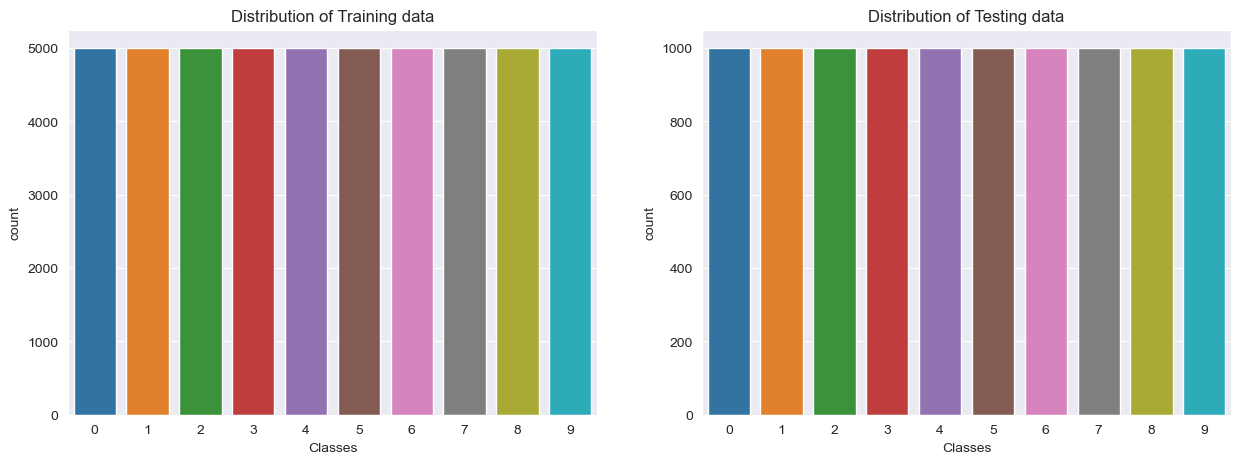

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

# Count plot for training set
sns.countplot(x=y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Training data')
axs[0].set_xlabel('Classes')

# Count plot for testing set
sns.countplot(x=y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

Creating a histogram of pixel values.

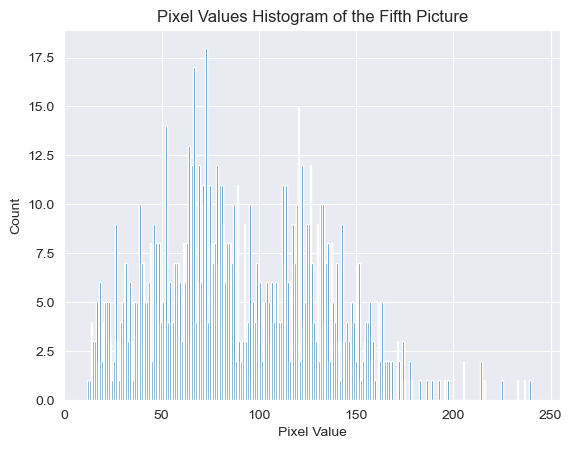

In [26]:
# Randomly choosing the fifth image for analysis
image = X_train[5]

# calculating mean value from RGB channels and flatten to 1D array
vals = X_train[5].mean(axis=2).flatten()

# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.title("Pixel Values Histogram of the Fifth Picture")
plt.show()

Looking at the pixel values, it can be observed that the red pixels are in a greater majority in this picture. When the picture below is shown with matplotlib, a predictable result is obtained.

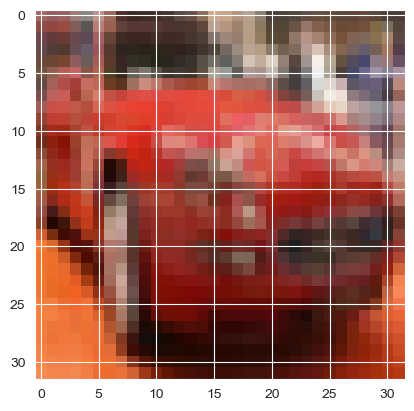

In [37]:
plt.imshow(X_train[5])
plt.show()

Converting data type to float for computation.

In [38]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Normalizing the training data

In [39]:
X_train /= 255
X_test /= 255

## Applying KNN Algorithm

It is a good practice to trying different values of k in k-fold cross-validation and choose the value that gives the best performance on the dataset.

The choice of k affects **the bias and variance** of the estimated performance of the model. A larger value of k will result in a lower bias but a higher variance, while a smaller value of k will result in a higher bias but a lower variance.

Typically, a value of k between 5 and 10 is used, but the optimal value depends on the size of the dataset, the complexity of the model, and other factors specific to the problem. For all of these reasons 3, 5 and 10 will be used for the k_fold parameter.

In [11]:
# Defining the list of k values to try
k_values = [1, 3, 5, 7, 9,11,13]

# Defining the list of k-fold values to try
k_fold_values = [3, 5, 10]

for k_fold in k_fold_values:
    kf = KFold(n_splits=k_fold, shuffle=True)

    for k in k_values:
        # Creating the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Initialize the list to store the accuracies
        accuracies = []

        # Loop over the folds
        for train_index, test_index in kf.split(X_train):
            # Split the data into train and test sets for this fold
            x_train_fold, x_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

            # Fitting the KNN model on the train data
            knn.fit(x_train_fold, y_train_fold.ravel())

            # Evaluating the model on the test data and store the accuracy
            accuracy = knn.score(x_test_fold, y_test_fold)
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies)

        print(f"k = {k}, k_fold = {k_fold}, accuracy = {mean_accuracy}")

k = 1, k_fold = 3, accuracy = 0.3331400430673734
k = 3, k_fold = 3, accuracy = 0.316759962652661
k = 5, k_fold = 3, accuracy = 0.32610000266093325
k = 7, k_fold = 3, accuracy = 0.3258399550597732
k = 9, k_fold = 3, accuracy = 0.32621987185841306
k = 11, k_fold = 3, accuracy = 0.32493994305881313
k = 13, k_fold = 3, accuracy = 0.32575996745995717
k = 1, k_fold = 5, accuracy = 0.33964000000000005
k = 3, k_fold = 5, accuracy = 0.32632
k = 5, k_fold = 5, accuracy = 0.33222
k = 7, k_fold = 5, accuracy = 0.33311999999999997
k = 9, k_fold = 5, accuracy = 0.3333
k = 11, k_fold = 5, accuracy = 0.33096
k = 13, k_fold = 5, accuracy = 0.32926
k = 1, k_fold = 10, accuracy = 0.34615999999999997
k = 3, k_fold = 10, accuracy = 0.32908
k = 5, k_fold = 10, accuracy = 0.33634000000000003
k = 7, k_fold = 10, accuracy = 0.33764000000000005
k = 9, k_fold = 10, accuracy = 0.33766
k = 11, k_fold = 10, accuracy = 0.33494
k = 13, k_fold = 10, accuracy = 0.33306


_As seen in the results, the highest accuracy value was obtained when k parameter was 1 and 10 fold cross validation was applied. The second highest accuracy value was obtained when k parameter was 1 and 5 fold cross validation was applied. Again, when 3-fold cross validation was applied, the highest accuracy was obtained when 1 was selected for the k parameter. However, it is not possible to conclude that the accuracy decreases as the k parameter increases. Because although they are very close to each other, the values of 5 and 7 for k also give good results. However, when the k value is 9, the value decreases again. When evaluated in general, it is observed that choosing the k_fold value as 10 is more optimal._

If the k parameter is increased beyond 9, a decrease in accuracy for 3_fold and 10_fold, increase and then again decrease for 5_fold can be observed. But accuracy values does not change too much and not more than the highest value. So it is meaningless increase k parameter more.

In [12]:
final_knn_model = KNeighborsClassifier(n_neighbors=1)
final_knn_model.fit(X_train, y_train.ravel())
knn_predictions = final_knn_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,knn_predictions))

Accuracy Score:  0.3539


In [13]:
conf_matrix = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix of the KNN Model:\n",conf_matrix)

Confusion Matrix of the KNN Model:
 [[485  16 109  20  73  20  31  11 221  14]
 [107 218  81  55 131  54  74  29 204  47]
 [ 84   0 384  61 244  57  94  16  55   5]
 [ 44   5 168 240 152 148 140  41  49  13]
 [ 58   4 216  51 457  48  85  25  54   2]
 [ 49   3 162 144 148 290 112  30  51  11]
 [ 27   2 193  79 239  56 353  11  36   4]
 [ 64  12 143  62 201  66  86 294  56  16]
 [117  19  50  42  77  22  24  13 619  17]
 [109  57  78  69 112  37  76  56 207 199]]


In [14]:
class_report = classification_report(y_test, knn_predictions)
print("Classification Report of the KNN Model:\n",class_report)

Classification Report of the KNN Model:
               precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.65      0.22      0.33      1000
           2       0.24      0.38      0.30      1000
           3       0.29      0.24      0.26      1000
           4       0.25      0.46      0.32      1000
           5       0.36      0.29      0.32      1000
           6       0.33      0.35      0.34      1000
           7       0.56      0.29      0.39      1000
           8       0.40      0.62      0.49      1000
           9       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



## Applying SVM Algorithm

Although not mentioned here, initially, attempts were made to create SVM models using all of the data with different parameters. However, due to a lengthy cross-validation process, the use of all the data was unfortunately abandoned without any results. Instead, the dimension reduction process was performed first by applying PCA. A value of 100 was selected for n_component based on previous studies.

In [14]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_train)

In [21]:
X_test_pca = pca.transform(X_test)

By choosing cv=10 with GridSearchCV, the best parameters were obtained with 6 different combinations.

In [15]:
param_grid = {'C': [0.1, 1, 10], 'kernel':['linear', 'rbf']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=10,n_jobs=-1)
grid_search.fit(X_pca, y_train.ravel())
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'kernel': 'rbf'}
Best accuracy score:  0.5544999999999999


Creating a SVM model with using best parameters.

In [28]:
final_svm_model = SVC(C=10,kernel='rbf')
final_svm_model.fit(X_pca, y_train.ravel())

SVC(C=10)

In [29]:
svm_predictions = final_svm_model.predict(X_test_pca)

However, it was observed that an overfitting situation was encountered as a result of the classification results using this model. Because in the prediction made with test data, the accuracy value is 20.86%. This overfitting problem can be occured because of the pca.

In [30]:
print("Accuracy Score: ",accuracy_score(y_test,svm_predictions))
conf_matrix = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix of the KNN Model:\n",conf_matrix)

Accuracy Score:  0.2086
Confusion Matrix of the KNN Model:
 [[236  54 114 140  70  59  56  51 151  69]
 [ 73 208  46 103  37  82  53  98 137 163]
 [126  42 239  96 184  52 122  61  43  35]
 [127  87  73 175 108 124 107  82  51  66]
 [ 63  41 208 110 235  51 154  61  37  40]
 [ 99  57  93 172  91 181  77 106  71  53]
 [ 83  46 152 103 184  73 210  84  20  45]
 [ 68 145  83  85 109 103  72  82  83 170]
 [172 104  43  65  52  59  25  93 264 123]
 [ 73 182  29 105  27  68  37 111 112 256]]


The same methods were repeated using some of the data, not all. Subsets were created by taking 10000 data from train data and 2000 data from test data, and cross validation structures and best parameters were learned again with GridSearch.

In [11]:
train_subset_size = 10000
subset_indices = np.random.choice(len(X_train),train_subset_size,replace=False)
X_train_subset = X_train[subset_indices]
y_train_subset = y_train[subset_indices]

test_subset_size = 2000
test_subset_indices = np.random.choice(len(X_test),test_subset_size,replace=False)
X_test_subset = X_test[test_subset_indices]
y_test_subset = y_test[test_subset_indices]

In [12]:
param_grid = {'C': [0.1, 1, 10], 'kernel':['linear', 'rbf']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset.ravel())
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'kernel': 'rbf'}
Best accuracy score:  0.46559999999999996


In [37]:
param_grid = {'C': [0.1, 1, 10], 'kernel':['linear', 'rbf']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=10,n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset.ravel())
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'kernel': 'rbf'}
Best accuracy score:  0.4628


Again new SVM model created with best parameters.

In [38]:
final_svm = SVC(C=10,kernel='rbf')
final_svm.fit(X_train_subset, y_train_subset.ravel())

SVC(C=10)

In [39]:
final_svm_predictions = final_svm.predict(X_test_subset)

In [41]:
print("Accuracy Score: ",accuracy_score(y_test_subset,final_svm_predictions))
conf_matrix = confusion_matrix(y_test_subset, final_svm_predictions)
print("Confusion Matrix of the KNN Model:\n",conf_matrix)

Accuracy Score:  0.468
Confusion Matrix of the KNN Model:
 [[111   8  13   9   5   5   7  10  34   9]
 [ 14 120   1  10   3   4   3   1  11  33]
 [ 16   4  85  16  23  25  12  12   3   6]
 [  6   6  18  66  15  47  13  13   5  14]
 [ 11   2  38  12  74  10  21  20   7   3]
 [  6   2  19  49  11  89   7  12   6   6]
 [  1   5  26  26  25  11  83   8   3   3]
 [ 11  10  13  15  19  16   4 100   1  14]
 [ 31  17   5  13   0   7   2   2 121   9]
 [ 15  36   0  11   3   7   3   8   8  87]]


This time, it gave the same value as the best accuracy value with gridsearch.

In [42]:
class_report = classification_report(y_test_subset, final_svm_predictions)
print("Classification Report of the KNN Model:\n",class_report)

Classification Report of the KNN Model:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51       211
           1       0.57      0.60      0.59       200
           2       0.39      0.42      0.40       202
           3       0.29      0.33      0.31       203
           4       0.42      0.37      0.39       198
           5       0.40      0.43      0.42       207
           6       0.54      0.43      0.48       191
           7       0.54      0.49      0.51       203
           8       0.61      0.58      0.60       207
           9       0.47      0.49      0.48       178

    accuracy                           0.47      2000
   macro avg       0.47      0.47      0.47      2000
weighted avg       0.47      0.47      0.47      2000



## MLP

Converting class vectors to binary class matrices. This is called **one hot encoding**.

In [41]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [44]:
def create_model(num_layers, num_neurons, activation_func, optimizer_func, num_epochs):
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=(3072,), activation=activation_func))
    for i in range(num_layers-1):
        model.add(Dense(num_neurons, activation=activation_func))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  optimizer=optimizer_func,
                  metrics=[categorical_accuracy])

    # Train the model
    history = model.fit(X_train, y_train,
                        batch_size=128,
                        epochs=num_epochs,
                        validation_data=(X_test, y_test),
                        verbose=1)
    return history

In [28]:
# Defining a list of parameters to try
num_layers_list = [1, 2, 3]
num_neurons_list = [128, 256, 512]
activation_func_list = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
optimizer_func_list = ['sgd', 'adam', 'adagrad', 'rmsprop']
num_epoch = 10

# Training the models with different parameters and store the training history
histories = []
for num_layers in num_layers_list:
    for num_neurons in num_neurons_list:
        for activation_func in activation_func_list:
            for optimizer_func in optimizer_func_list:
                    print(f"Training model with {num_layers} layers, {num_neurons} neurons, {activation_func} activation function, {optimizer_func} optimizer function, and {num_epoch} epochs.")
                    history = create_model(num_layers, num_neurons, activation_func, optimizer_func, num_epoch)
                    histories.append(history)

Training model with 1 layers, 128 neurons, relu activation function, sgd optimizer function, and 10 epochs.
Epoch 1/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0015 - categorical_accuracy: 0.2819 - val_loss: 1.8960 - val_categorical_accuracy: 0.3246
Epoch 2/10
391/391 [==============================] - 1s 4ms/step - loss: 1.8414 - categorical_accuracy: 0.3530 - val_loss: 1.8260 - val_categorical_accuracy: 0.3539
Epoch 3/10
391/391 [==============================] - 1s 4ms/step - loss: 1.7782 - categorical_accuracy: 0.3781 - val_loss: 1.7737 - val_categorical_accuracy: 0.3789
Epoch 4/10
391/391 [==============================] - 1s 4ms/step - loss: 1.7344 - categorical_accuracy: 0.3940 - val_loss: 1.7264 - val_categorical_accuracy: 0.3897
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 1.7029 - categorical_accuracy: 0.4075 - val_loss: 1.7040 - val_categorical_accuracy: 0.4053
Epoch 6/10
391/391 [==============================] - 2s 4ms/s

In the graph below, validation accuracy values in different epochs of the first 5 models are observed.

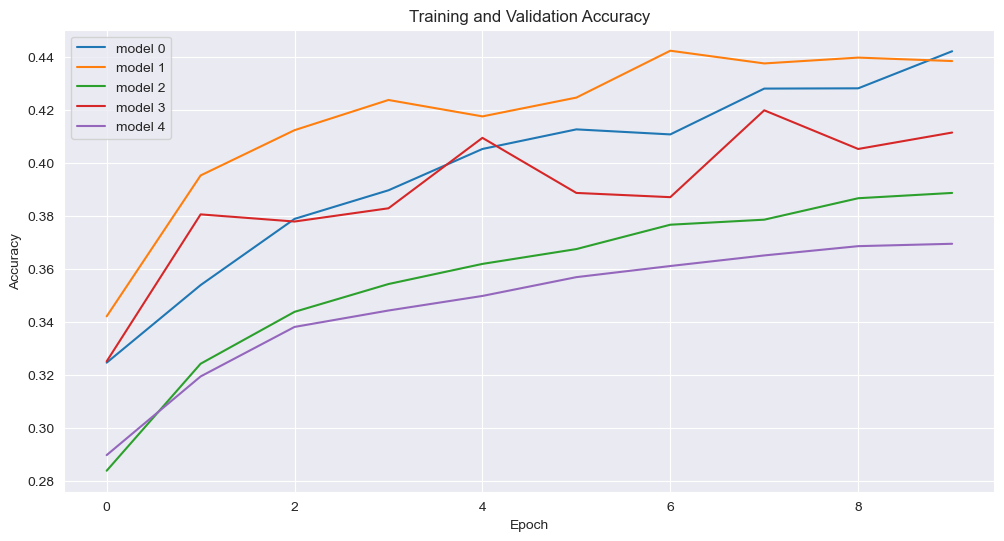

In [42]:
# Plot the training and validation accuracy for first 5 model
plt.figure(figsize=(12, 6))
for i, history in enumerate(histories[0:5]):
    plt.plot(history.history['val_categorical_accuracy'], label='model %d' % i)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
histories = []
num_epoch = 20
for optimizer_func in optimizer_func_list:
    print(f"Training model with {2} layers, {256} neurons, {'leaky_relu'} activation function, {optimizer_func} optimizer function, and {num_epoch} epochs.")
    history = create_model(2, 256, 'leaky_relu', optimizer_func, num_epoch)
    histories.append(history)

Training model with 2 layers, 256 neurons, leaky_relu activation function, sgd optimizer function, and 20 epochs.
Epoch 1/20
391/391 [==============================] - 2s 5ms/step - loss: 1.9921 - categorical_accuracy: 0.2852 - val_loss: 1.8754 - val_categorical_accuracy: 0.3355
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8304 - categorical_accuracy: 0.3564 - val_loss: 1.8189 - val_categorical_accuracy: 0.3463
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7629 - categorical_accuracy: 0.3807 - val_loss: 1.7356 - val_categorical_accuracy: 0.3918
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7160 - categorical_accuracy: 0.3979 - val_loss: 1.7018 - val_categorical_accuracy: 0.3979
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6795 - categorical_accuracy: 0.4113 - val_loss: 1.6601 - val_categorical_accuracy: 0.4215
Epoch 6/20
391/391 [==============================] - 2s

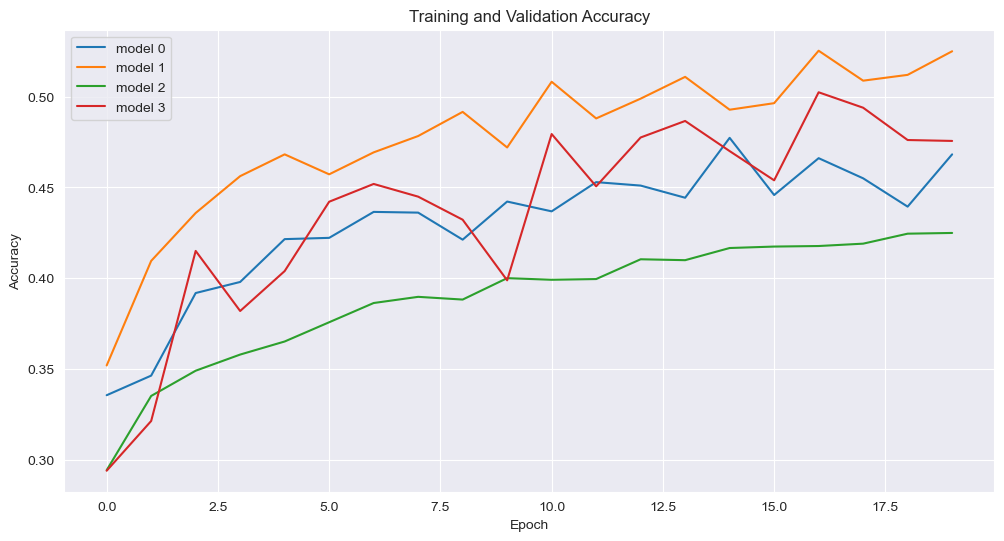

In [44]:
plt.figure(figsize=(12, 6))
for i, history in enumerate(histories[0:4]):
    plt.plot(history.history['val_categorical_accuracy'], label='model %d' % i)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Creating final Neural Network Model:

In [42]:
num_layers = 2
num_neurons = 256
activation_func = 'leaky_relu'
optimizer_func = 'adam'

final_model = Sequential()
final_model.add(Dense(num_neurons, input_shape=(3072,), activation=activation_func))
for i in range(num_layers-1):
    final_model.add(Dense(num_neurons, activation=activation_func))
final_model.add(Dense(num_classes, activation='softmax'))

final_model.compile(loss=categorical_crossentropy,
                    optimizer=optimizer_func,
                    metrics=[categorical_accuracy])
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


Training the final neural network model:

In [7]:
history = final_model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
391/391 [==============================] - 4s 10ms/step - loss: 1.9061 - categorical_accuracy: 0.3183 - val_loss: 1.7718 - val_categorical_accuracy: 0.3607
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.7004 - categorical_accuracy: 0.3916 - val_loss: 1.6272 - val_categorical_accuracy: 0.4196
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6161 - categorical_accuracy: 0.4235 - val_loss: 1.6697 - val_categorical_accuracy: 0.3956
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5614 - categorical_accuracy: 0.4452 - val_loss: 1.5447 - val_categorical_accuracy: 0.4466
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5158 - categorical_accuracy: 0.4600 - val_loss: 1.5204 - val_categorical_accuracy: 0.4606
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 1.4770 - categorical_accuracy: 0.4755 - val_loss: 1.6025 - val_categorical_accuracy: 0.4326

In [8]:
neural_network_predictions = final_model.predict(X_test)
neural_network_predictions = np.argmax(neural_network_predictions,axis=1)
y_test = np.argmax(y_test,axis=1)

313/313 [==============================] - 0s 1ms/step


In [9]:
cm = confusion_matrix(y_test, neural_network_predictions)
precision = precision_score(y_test, neural_network_predictions,average='micro')
# Display results
print("Confusion Matrix:")
print(cm)
print("Precision Score:", precision)

Confusion Matrix:
[[586  90  55  24  21  12  16  17 161  18]
 [ 17 768  14  24   4   4  13  17  78  61]
 [ 78  52 471 129  47  33  80  61  36  13]
 [ 37  66  86 440  20 102 108  53  55  33]
 [ 67  24 210 126 307  28 111  72  50   5]
 [ 36  34  91 311  33 299  62  68  51  15]
 [ 25  49 102 114  47  39 572  21  25   6]
 [ 41  40  76  85  42  49  30 570  37  30]
 [ 87 112  16  25  11   9   6   5 704  25]
 [ 41 355  12  42  10   9  20  35  90 386]]
Precision Score: 0.5103


In [10]:
classification_report = classification_report(y_test, neural_network_predictions)
print("Classification Report of the Neural Network Model:\n",classification_report)

Classification Report of the Neural Network Model:
               precision    recall  f1-score   support

           0       0.58      0.59      0.58      1000
           1       0.48      0.77      0.59      1000
           2       0.42      0.47      0.44      1000
           3       0.33      0.44      0.38      1000
           4       0.57      0.31      0.40      1000
           5       0.51      0.30      0.38      1000
           6       0.56      0.57      0.57      1000
           7       0.62      0.57      0.59      1000
           8       0.55      0.70      0.62      1000
           9       0.65      0.39      0.48      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.50     10000
weighted avg       0.53      0.51      0.50     10000



After completing the project and the steps expected from me, I started to examine similar projects, neural networks created for this dataset. Then I tried again by giving the best parameters I set, epoch = 30 and updating the number of num_layers to 3.

In [46]:
num_epoch = 30
print(f"Training model with {3} layers, {256} neurons, {'leaky_relu'} activation function, {'adam'} optimizer function, and {num_epoch} epochs.")
history = create_model(2, 256, 'leaky_relu', 'adam', num_epoch)

Training model with 3 layers, 256 neurons, leaky_relu activation function, adam optimizer function, and 30 epochs.
Epoch 1/30
391/391 [==============================] - 4s 10ms/step - loss: 1.8833 - categorical_accuracy: 0.3247 - val_loss: 1.7224 - val_categorical_accuracy: 0.3765
Epoch 2/30
391/391 [==============================] - 3s 9ms/step - loss: 1.6991 - categorical_accuracy: 0.3938 - val_loss: 1.6398 - val_categorical_accuracy: 0.4177
Epoch 3/30
391/391 [==============================] - 4s 9ms/step - loss: 1.6122 - categorical_accuracy: 0.4275 - val_loss: 1.5771 - val_categorical_accuracy: 0.4375
Epoch 4/30
391/391 [==============================] - 3s 9ms/step - loss: 1.5576 - categorical_accuracy: 0.4466 - val_loss: 1.5879 - val_categorical_accuracy: 0.4347
Epoch 5/30
391/391 [==============================] - 3s 9ms/step - loss: 1.5101 - categorical_accuracy: 0.4640 - val_loss: 1.5251 - val_categorical_accuracy: 0.4567
Epoch 6/30
391/391 [==============================] - 

When I tried with these parameters, I observed that while the train loss always decreases, the validation loss decreases to a certain extent, but then continues as a continuous rise and fall. These observations can be observed in the graph below.

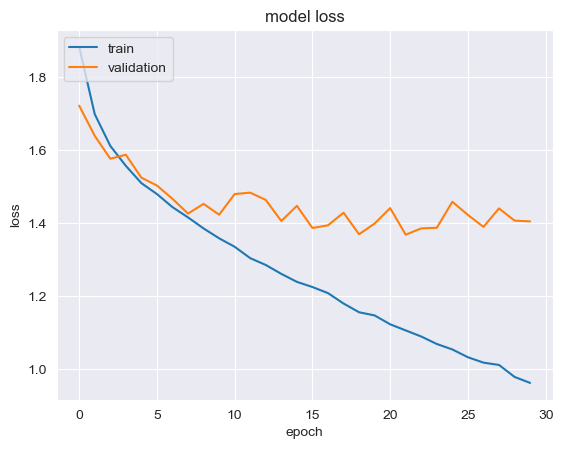

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Based on these observations, I decided to add Dropout to the neural network model against the overfitting problem.

In [50]:
num_layers = 3
num_neurons = 256
activation_func = 'leaky_relu'
optimizer_func = 'adam'

final_model = Sequential()
final_model.add(Flatten(input_shape = X_train.shape[1:]))
final_model.add(Dense(num_neurons, input_shape=(3072,), activation=activation_func))
for i in range(num_layers-1):
    final_model.add(Dropout(0.2))
    final_model.add(Dense(num_neurons, activation=activation_func))
final_model.add(Dense(num_classes, activation='softmax'))

final_model.compile(loss=categorical_crossentropy,
                    optimizer=optimizer_func,
                    metrics=[categorical_accuracy])
final_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 256)               786688    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 10)               

In [51]:
history = final_model.fit(X_train, y_train,
                          batch_size=128,
                          epochs=30,
                          validation_data=(X_test, y_test),
                          verbose=1)

Epoch 1/30
391/391 [==============================] - 4s 10ms/step - loss: 1.9584 - categorical_accuracy: 0.2871 - val_loss: 1.7802 - val_categorical_accuracy: 0.3661
Epoch 2/30
391/391 [==============================] - 4s 10ms/step - loss: 1.7788 - categorical_accuracy: 0.3591 - val_loss: 1.6412 - val_categorical_accuracy: 0.4159
Epoch 3/30
391/391 [==============================] - 4s 10ms/step - loss: 1.7025 - categorical_accuracy: 0.3881 - val_loss: 1.6118 - val_categorical_accuracy: 0.4395
Epoch 4/30
391/391 [==============================] - 4s 10ms/step - loss: 1.6482 - categorical_accuracy: 0.4078 - val_loss: 1.5668 - val_categorical_accuracy: 0.4462
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 1.6077 - categorical_accuracy: 0.4245 - val_loss: 1.5452 - val_categorical_accuracy: 0.4513
Epoch 6/30
391/391 [==============================] - 4s 10ms/step - loss: 1.5750 - categorical_accuracy: 0.4403 - val_loss: 1.5122 - val_categorical_accuracy: 0.451

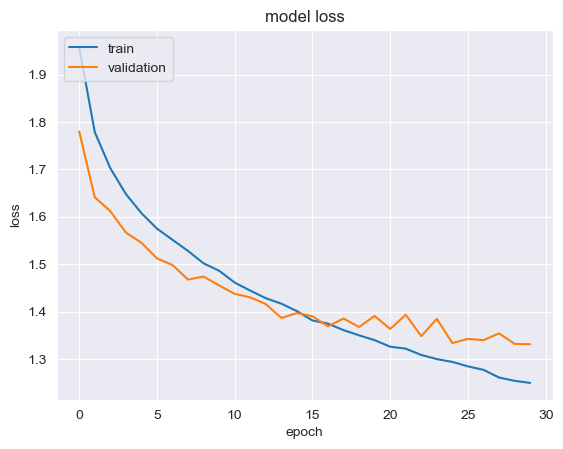

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As a result of these regulations, the validation loss value decreased together with the train loss value. However, as can be seen from the graph, 20 instead of 30 epoch values will give more effective results. The final_model and classification report values created as a result of all these arrangements were examined.

## Final Neural Network Model

In [53]:
num_neurons = 256
activation_func = 'leaky_relu'
optimizer_func = 'adam'

final_model = Sequential()
final_model.add(Flatten(input_shape = X_train.shape[1:]))
final_model.add(Dense(num_neurons, input_shape=(3072,), activation=activation_func))
for i in range(num_layers-1):
    final_model.add(Dropout(0.2))
    final_model.add(Dense(num_neurons, activation=activation_func))
final_model.add(Dense(num_classes, activation='softmax'))

final_model.compile(loss=categorical_crossentropy,
                    optimizer=optimizer_func,
                    metrics=[categorical_accuracy])
final_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_19 (Dense)            (None, 256)               786688    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 10)               

In [54]:
history = final_model.fit(X_train, y_train,
                          batch_size=128,
                          epochs=20,
                          validation_data=(X_test, y_test),
                          verbose=1)

Epoch 1/20
391/391 [==============================] - 4s 10ms/step - loss: 1.9447 - categorical_accuracy: 0.2930 - val_loss: 1.7662 - val_categorical_accuracy: 0.3658
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.7810 - categorical_accuracy: 0.3592 - val_loss: 1.6444 - val_categorical_accuracy: 0.4083
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.7059 - categorical_accuracy: 0.3878 - val_loss: 1.6032 - val_categorical_accuracy: 0.4242
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6519 - categorical_accuracy: 0.4089 - val_loss: 1.5844 - val_categorical_accuracy: 0.4358
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6072 - categorical_accuracy: 0.4255 - val_loss: 1.5412 - val_categorical_accuracy: 0.4522
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5815 - categorical_accuracy: 0.4343 - val_loss: 1.6275 - val_categorical_accuracy: 0.424

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [55]:
final_neural_network_predictions = final_model.predict(X_test)
final_neural_network_predictions = np.argmax(final_neural_network_predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

313/313 [==============================] - 0s 1ms/step


In [56]:
cm = confusion_matrix(y_test, final_neural_network_predictions)
precision = precision_score(y_test, final_neural_network_predictions, average='micro')
# Display results
print("Confusion Matrix:")
print(cm)
print("Precision Score:", precision)

Confusion Matrix:
[[569  24  66   6  43  12  43  28 174  35]
 [ 59 582  20  11  13  13  23  21 108 150]
 [ 70  15 356  43 192  63 142  75  29  15]
 [ 33  16  88 234  78 193 206  67  37  48]
 [ 43   7  99  22 508  38 144  86  40  13]
 [ 22  10  88 143  91 387 123  79  32  25]
 [  4   8  41  36 125  36 694  20  20  16]
 [ 40   9  50  38  98  47  29 614  31  44]
 [ 99  34  16  13  25  11  19  19 711  53]
 [ 49 131  11  13  21  15  26  54 101 579]]
Precision Score: 0.5234


In [57]:
final_classification_report = classification_report(y_test, final_neural_network_predictions)
print("Classification Report of the Neural Network Model:\n",final_classification_report)

Classification Report of the Neural Network Model:
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      1000
           1       0.70      0.58      0.63      1000
           2       0.43      0.36      0.39      1000
           3       0.42      0.23      0.30      1000
           4       0.43      0.51      0.46      1000
           5       0.47      0.39      0.43      1000
           6       0.48      0.69      0.57      1000
           7       0.58      0.61      0.60      1000
           8       0.55      0.71      0.62      1000
           9       0.59      0.58      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



## Conclusion
As a result, many different models were created with different parameter and function selections by working with 3 different classification algorithms during this assignment. Activation and optimization functions giving the best results were obtained with the model formed in the neural network network formed with layer numbers and neurons numbers. The biggest difficulty experienced in the assignment was that it took a very long time while cross validating the SVM algorithm. This problem was first tried to be solved with the pca application, but when the overfitting problem was encountered, this problem was solved by using a part of the data, not all of it. Obtained results were compared and evaluated.